In [49]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 

In [50]:
category = ["Price-Sensitive Customers" , "Product-Focused Customers" , "Loyalty-Driven Customers" , "Convenience-Oriented Customers" , "High-Value Customers"]

categories = []

for i in category:
    df = pd.read_excel("Category.xlsx" , sheet_name = i)
    categories.append(df)

In [51]:
categories[0]

,ราคาขาย,ส่วนลดจาก Shopee,โค้ดส่วนลดชำระโดยผู้ขาย,โค้ด Coins Cashback
0,49.0,0,0,0
1,30.0,0,0,0
2,35.0,0,0,0
3,29.5,0,0,0
4,49.0,0,0,0
...,...,...,...,...
1836,15.0,0,0,0
1837,15.0,0,0,0
1838,49.0,0,0,0
1839,48.0,0,0,0


**Data Preprocessing**

In [52]:
scaler = MinMaxScaler()
for feature in categories[0].columns:
    categories[0][[feature]] = scaler.fit_transform(categories[0][[feature]])

In [53]:
sse = []
k_range = range(1 , 10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(categories[0])
    sse.append(km.inertia_)

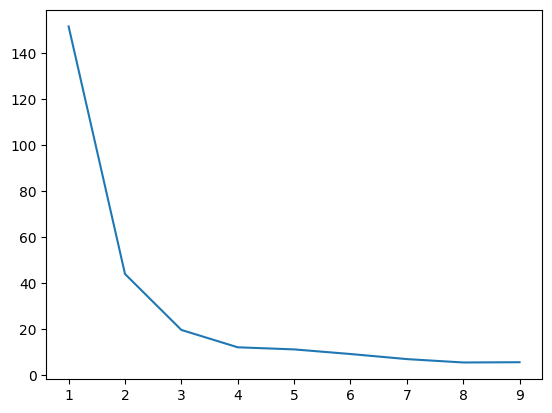

In [54]:
plt.plot(k_range , sse)

In [55]:
#4 is the elbow point
km = KMeans(n_clusters= 3)

In [56]:
km.fit(categories[0])

KMeans(n_clusters=3)

In [57]:
y_pred = km.predict(categories[0])

categories[0]["cluster"] = y_pred

In [58]:
cluster_list = []
for i in range(3):
    cluster_list.append(categories[0][categories[0]["cluster"] == i])

In [59]:
cluster_list[0]

,ราคาขาย,ส่วนลดจาก Shopee,โค้ดส่วนลดชำระโดยผู้ขาย,โค้ด Coins Cashback,cluster
0,0.077544,0.0,0.0,0.0,0
1,0.046850,0.0,0.0,0.0,0
2,0.054927,0.0,0.0,0.0,0
3,0.046042,0.0,0.0,0.0,0
4,0.077544,0.0,0.0,0.0,0
...,...,...,...,...,...
1836,0.022617,0.0,0.0,0.0,0
1837,0.022617,0.0,0.0,0.0,0
1838,0.077544,0.0,0.0,0.0,0
1839,0.075929,0.0,0.0,0.0,0


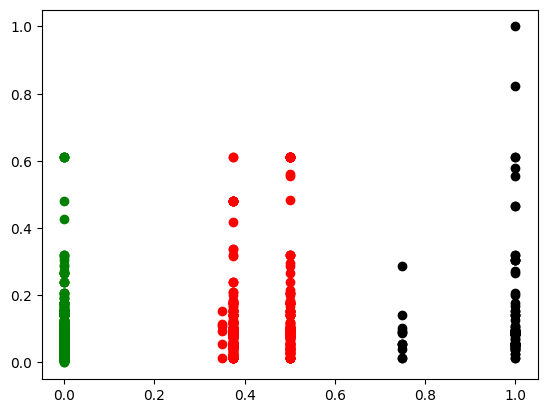

In [60]:
colors = ["green" , "red" , "black"]

for i in range(3):
    plt.scatter(cluster_list[i][["โค้ดส่วนลดชำระโดยผู้ขาย"]] , cluster_list[i][["ราคาขาย"]] , color = colors[i])